In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [ ]:
# START (Question asked : Machine Learning)-> TITLE CREATOR (Take the question and generate the title) -> CONTENT (Take the Title and Generate the Content)-> END (Display)

from langchain_core.tools import tool
from langgraph.graph import MessagesState
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

In [ ]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o-mini")

In [8]:
# This will be a tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

In [9]:
from langchain_openai import ChatOpenAI
tools=[add]

llm=ChatOpenAI(model="gpt-4o")
llm_with_tools=llm.bind_tools(tools,parallel_tool_calls=False)


In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage

## Title Assistant
system_message_title = SystemMessage(
    content=(
        "You are an intelligent blog title generator. Your task is to create catchy, engaging, "
        "and relevant single title based on the subject or text provided to you. Ensure that the titles "
        "are concise, informative, and tailored to attract readers' attention. Aim for creativity "
        "while maintaining clarity and relevance to the topic at hand."
    )
)
def title_assistant(state:MessagesState):
    return {"messages":[llm_with_tools.invoke([system_message_title] + state["messages"])]}

## Blog Content Assistant
system_message_content = SystemMessage(
    content=(
        "You are a blog content generator. Your task is to create informative, engaging, and "
        "well-structured content based on the title provided to you. Ensure that the content is "
        "relevant, coherent, and tailored to the target audience. Aim for clarity, depth, and "
        "engagement while maintaining a high level of quality and accuracy."
    )
)
def content_assistant(state:MessagesState):
    return {"messages":[llm_with_tools.invoke([system_message_content] + state["messages"])]}

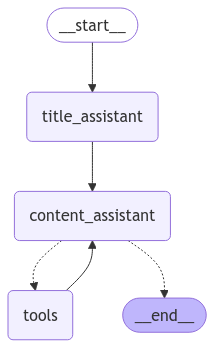

In [12]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

builder=StateGraph(MessagesState)

# Define the nodes
builder.add_node("title_assistant", title_assistant)
builder.add_node("content_assistant", content_assistant)
builder.add_node("tools",ToolNode(tools))

# Define the edges
builder.add_edge(START, "title_assistant")
builder.add_edge("title_assistant", "content_assistant")
builder.add_conditional_edges(
    "content_assistant",
    # If the latest message (result) from content_assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from content_assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools","content_assistant")



react_graph=builder.compile()

# Show
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [16]:
messages = [HumanMessage(content="Generate a blog for AI Agents")]
messages = react_graph.invoke({"messages": messages})

In [17]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Generate a blog for AI Agents
================================== Ai Message ==================================

Sure! Here are some catchy titles for a blog about AI Agents:

1. "Beyond Bots: The Rise of Intelligent AI Agents"
2. "AI Agents: Revolutionizing How We Live and Work"
3. "From Science Fiction to Reality: The World of AI Agents"
4. "Unlocking the Potential of AI Agents: What You Need to Know"
5. "AI Agents in Action: Transforming Industries and Everyday Life"
6. "The Future is Here: How AI Agents are Changing the Game"
7. "Inside the Mind of AI Agents: Technology, Ethics, and Opportunities"
8. "AI Agents and the Promise of a Smarter Tomorrow"
9. "Personal Assistants to Complex Operatives: The Evolution of AI Agents"
10. "How AI Agents are Redefining Human-Machine Interaction"
================================== Ai Message ==================================

# Beyond Bots: The Rise of Intelligent 